--2021-08-30 12:50:31--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2021-08-30 12:50:31--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucad0b5c890241d935f02028a13c.dl.dropboxusercontent.com/cd/0/inline/BVMqvrPtHcuH7b0EP_Ab6NMa2JY5kDBI_FLrvdk3Ljfm28NflhDLshrKfJLDHv_v8ilhdF-2kjiBwYLoYv-C1iWeMgQOMmRNa8KC-sEWvT2usV2_sjk3LyPKDSY7hBRDVOAmXcXSPkivUGo0g6vO8J2y/file# [following]
--2021-08-30 12:50:32--  https://ucad0b5c890241d935f02028a13c.dl.dropboxusercontent.com/cd/0/inline/BVMqvrPtHcuH7b0EP_Ab6NMa2JY5kDBI_FLrvdk3Ljfm28NflhDLshrKfJLDHv_v8ilhdF-2kjiBwYLoYv-C1iWe

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [3]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [4]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "train", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

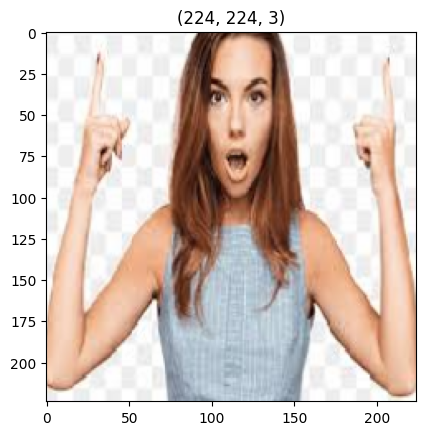

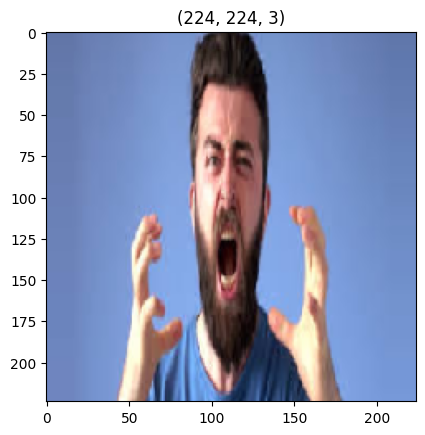

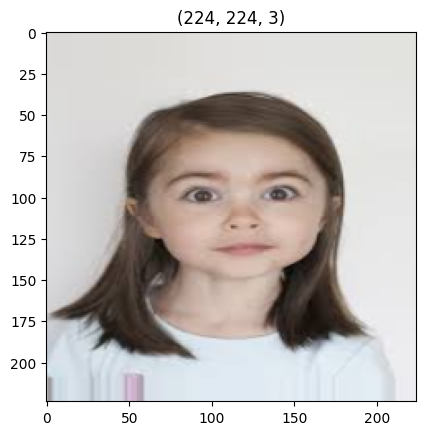

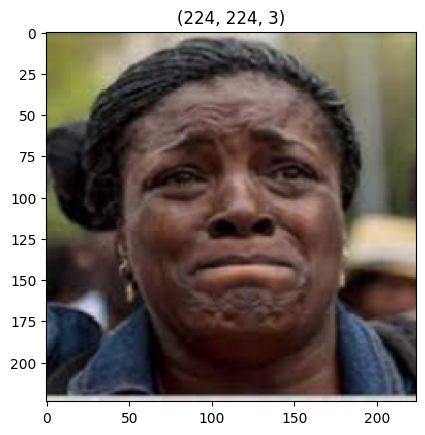

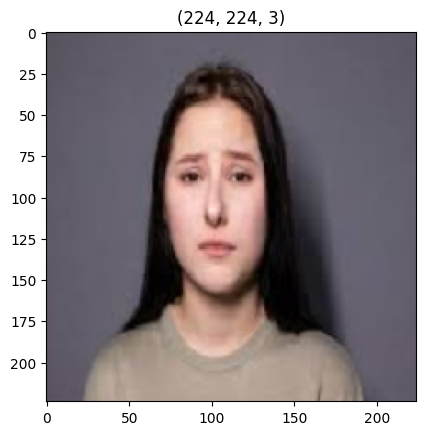

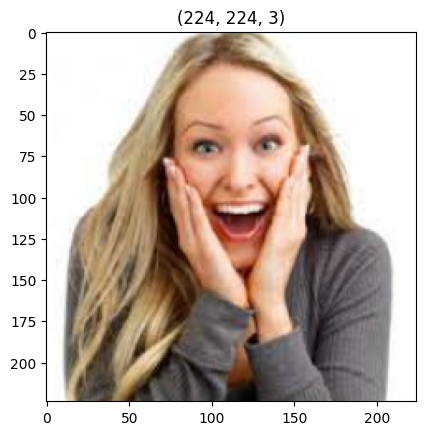

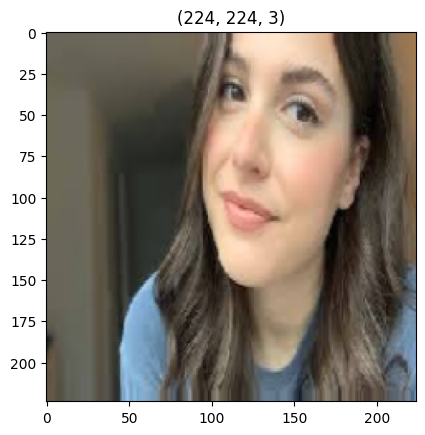

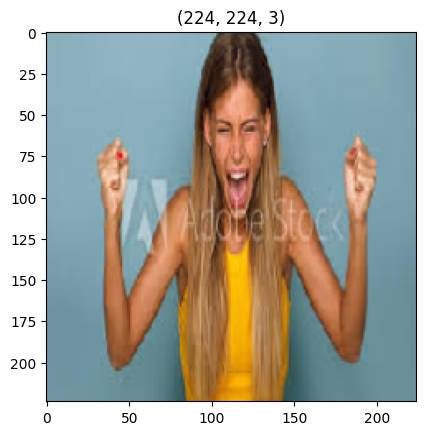

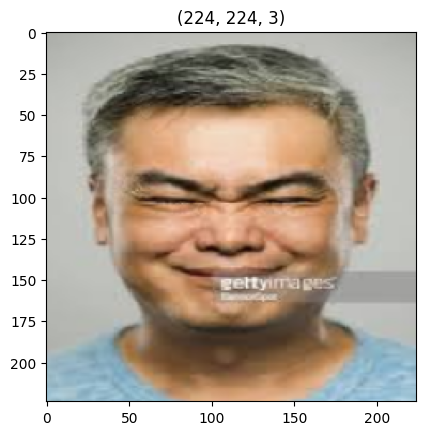

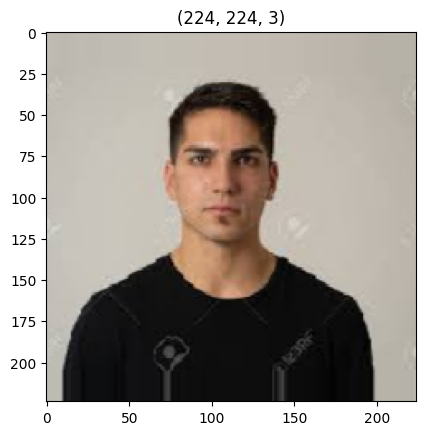

In [11]:
# to visualize the images in the traing data denerator 

t_img, label = next(train_data)
#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [14]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
model.save('best_model.keras')
new_model = load_model('best_model.keras')


# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# puting call back in a list 
call_back = [es, mc]

C:\Users\Faraz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 168 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [17]:
hist = new_model.fit(train_data, steps_per_epoch= 10, epochs= 30, validation_data= val_data, validation_steps= 8, callbacks=[es,mc]   )


Epoch 1/30


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1246 - loss: 3.7658
Epoch 1: val_accuracy improved from 0.14286 to 0.14844, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.1227 - loss: 3.8405 - val_accuracy: 0.1484 - val_loss: 4.3947
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2188 - loss: 4.3049

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.752.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy improved from 0.14844 to 0.14894, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.2188 - loss: 2.3677 - val_accuracy: 0.1489 - val_loss: 3.6139
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1451 - loss: 4.4256
Epoch 3: val_accuracy did not improve from 0.14894
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.1451 - loss: 4.4006 - val_accuracy: 0.1445 - val_loss: 3.3606
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1250 - loss: 3.2179
Epoch 4: val_accuracy improved from 0.14894 to 0.21277, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.1250 - loss: 1.7698 - val_accuracy: 0.2128 - val_loss: 1.9478
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1418 - loss: 2.4851
Epoch 5: val_accuracy did not improve from 0.21277
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.1429 - loss: 2.4877 - val_accuracy: 0.1445 - val_loss: 3.1780
Epoch

TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

In [19]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

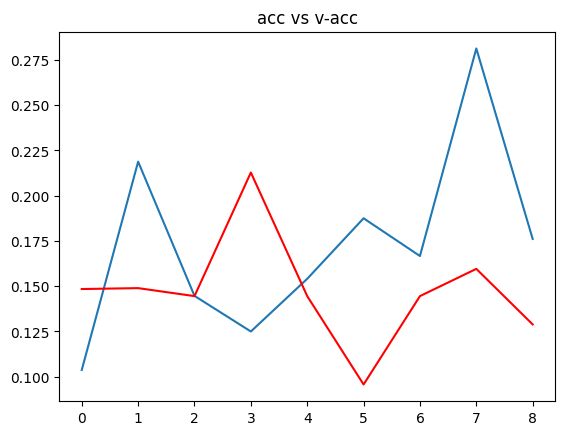

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

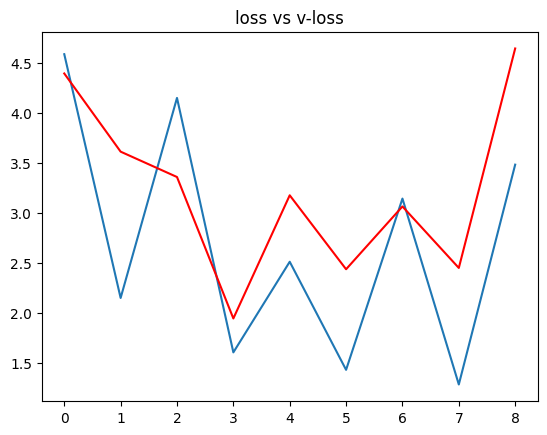

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [22]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 the image is of Happy


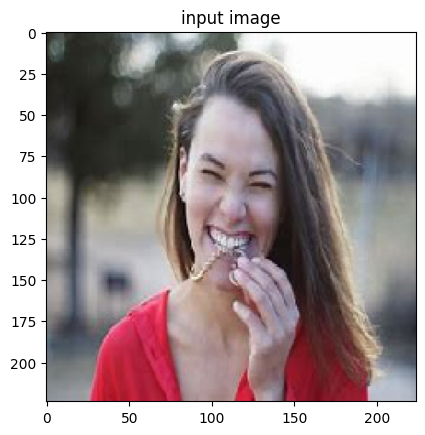

In [28]:
# path for the image to see if it predics correct class

path = "happy.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()